* In this assignment students need to predict whether a person makes over
  50K per year or not from classic adult dataset using XGBoost. The
  description of the dataset is as follows:
  
Data Set Information:
  
    * Extraction was done by Barry Becker from the 1994 Census
      database. A set of reasonably clean records was extracted using the
      following conditions: ((AAGE>16) && (AGI>100) &&
      (AFNLWGT>1)&& (HRSWK>0))

    Attribute Information: 
    
    Listing of attributes: >50K, <=50K.
    
    age: continuous.
    
    workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov,
    Local-gov, State-gov, Without-pay, Never-worked.
    
    fnlwgt: continuous.
    
    education: Bachelors, Some-college, 11th, HS-grad, Prof-school,
    Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th,
    Doctorate, 5th-6th, Preschool.
    education-num: continuous.

    marital-status: Married-civ-spouse, Divorced, Never-married,
    Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

    occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-
    managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct,
    Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv,
    Protective-serv, Armed-Forces.
    
    relationship: Wife, Own-child, Husband, Not-in-family, Other-relative,Unmarried.

    race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
    
    sex: Female, Male.
    
    capital-gain: continuous.
    
    capital-loss: continuous.
    
    hours-per-week: continuous.
    
    native-country: United-States, Cambodia, England, Puerto-Rico,
    Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan,
    Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy,
    Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France,
    Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia,
    Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-
    Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

Following is the code to load required libraries and data:

* import numpy as np
* import pandas as pd

* train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.dat a', header = None)

* test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None)

* col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
'marital_status', 'occupation','relationship', 'race', 'sex', capital_gain',
'capital_loss', 'hours_per_week', 'native_country', 'wage_class']

* train_set.columns = col_labels
* test_set.columns = col_labels

NOTE:ThesolutionsharedthroughGithubshouldcontainthesource

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)

In [4]:
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None)

In [5]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain',
'capital_loss', 'hours_per_week', 'native_country', 'wage_class']

In [6]:
train_set.columns = col_labels
test_set.columns = col_labels

In [7]:
train_set.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [8]:
df=train_set.copy()

we use label encoding when we rank the categorical data

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
labelencoder = LabelEncoder()

In [11]:
df['education'] = labelencoder.fit_transform(df['education'])

In [12]:
df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,9,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,9,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,11,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,1,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,9,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,12,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,6,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,11,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,12,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,9,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


for marital_status as this is not a ranked based categorical feature

we use onehotencoding

In [13]:
df2 = pd.get_dummies(df,drop_first = True)

In [14]:
df2.head(10)

,age,fnlwgt,education,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,wage_class_ >50K
0,39,77516,9,13,2174,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,9,13,0,0,13,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,11,9,0,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,1,7,0,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,9,13,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,37,284582,12,14,0,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,49,160187,6,5,0,0,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,52,209642,11,9,0,0,45,0,0,0,...,0,0,0,0,0,0,1,0,0,1
8,31,45781,12,14,14084,0,50,0,0,0,...,0,0,0,0,0,0,1,0,0,1
9,42,159449,9,13,5178,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [15]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [16]:
import xgboost as xgb
import xgboost as XGBRegressor
import pickle

In [17]:
df2.head()

,age,fnlwgt,education,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,wage_class_ >50K
0,39,77516,9,13,2174,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,9,13,0,0,13,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,11,9,0,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,1,7,0,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,9,13,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
X = df2.drop('wage_class_ >50K',axis=1)
y = df2['wage_class_ >50K']

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [75]:
eval_set = [(X_train, y_train), (X_test, y_test)]

In [76]:
model = xgb.XGBRegressor(objective='binary:logistic',n_estimators=300,learning_rate = 0.01) #logistic regression for binary classification, output probability

“binary:logistic” –logistic regression for binary classification, output probability

“binary:logitraw” –logistic regression for binary classification, output score before logistic transformation


In [77]:
model.fit(X_train,y_train,eval_metric=["error", "logloss"],eval_set=eval_set)

[0]	validation_0-error:0.14455	validation_0-logloss:0.68727	validation_1-error:0.14716	validation_1-logloss:0.68732
[1]	validation_0-error:0.14455	validation_0-logloss:0.68149	validation_1-error:0.14703	validation_1-logloss:0.68161
[2]	validation_0-error:0.14455	validation_0-logloss:0.67585	validation_1-error:0.14703	validation_1-logloss:0.67601
[3]	validation_0-error:0.14455	validation_0-logloss:0.67030	validation_1-error:0.14679	validation_1-logloss:0.67051
[4]	validation_0-error:0.14455	validation_0-logloss:0.66485	validation_1-error:0.14679	validation_1-logloss:0.66513
[5]	validation_0-error:0.14451	validation_0-logloss:0.65951	validation_1-error:0.14642	validation_1-logloss:0.65982
[6]	validation_0-error:0.14451	validation_0-logloss:0.65429	validation_1-error:0.14642	validation_1-logloss:0.65465
[7]	validation_0-error:0.14451	validation_0-logloss:0.64914	validation_1-error:0.14642	validation_1-logloss:0.64955
[8]	validation_0-error:0.14451	validation_0-logloss:0.64410	validation_1

[71]	validation_0-error:0.14095	validation_0-logloss:0.44726	validation_1-error:0.14372	validation_1-logloss:0.45038
[72]	validation_0-error:0.14083	validation_0-logloss:0.44538	validation_1-error:0.14372	validation_1-logloss:0.44854
[73]	validation_0-error:0.14087	validation_0-logloss:0.44350	validation_1-error:0.14359	validation_1-logloss:0.44669
[74]	validation_0-error:0.14079	validation_0-logloss:0.44166	validation_1-error:0.14359	validation_1-logloss:0.44488
[75]	validation_0-error:0.14079	validation_0-logloss:0.43986	validation_1-error:0.14359	validation_1-logloss:0.44314
[76]	validation_0-error:0.14075	validation_0-logloss:0.43805	validation_1-error:0.14359	validation_1-logloss:0.44133
[77]	validation_0-error:0.14079	validation_0-logloss:0.43626	validation_1-error:0.14359	validation_1-logloss:0.43958
[78]	validation_0-error:0.14079	validation_0-logloss:0.43453	validation_1-error:0.14359	validation_1-logloss:0.43791
[79]	validation_0-error:0.14079	validation_0-logloss:0.43280	val

[141]	validation_0-error:0.13722	validation_0-logloss:0.35936	validation_1-error:0.13954	validation_1-logloss:0.36486
[142]	validation_0-error:0.13718	validation_0-logloss:0.35857	validation_1-error:0.13942	validation_1-logloss:0.36409
[143]	validation_0-error:0.13722	validation_0-logloss:0.35779	validation_1-error:0.13942	validation_1-logloss:0.36336
[144]	validation_0-error:0.13714	validation_0-logloss:0.35703	validation_1-error:0.13942	validation_1-logloss:0.36262
[145]	validation_0-error:0.13698	validation_0-logloss:0.35627	validation_1-error:0.13930	validation_1-logloss:0.36190
[146]	validation_0-error:0.13698	validation_0-logloss:0.35551	validation_1-error:0.13930	validation_1-logloss:0.36118
[147]	validation_0-error:0.13698	validation_0-logloss:0.35477	validation_1-error:0.13942	validation_1-logloss:0.36046
[148]	validation_0-error:0.13694	validation_0-logloss:0.35403	validation_1-error:0.13930	validation_1-logloss:0.35976
[149]	validation_0-error:0.13686	validation_0-logloss:0.

[211]	validation_0-error:0.13522	validation_0-logloss:0.32004	validation_1-error:0.14003	validation_1-logloss:0.32828
[212]	validation_0-error:0.13526	validation_0-logloss:0.31966	validation_1-error:0.14003	validation_1-logloss:0.32792
[213]	validation_0-error:0.13526	validation_0-logloss:0.31927	validation_1-error:0.13991	validation_1-logloss:0.32760
[214]	validation_0-error:0.13526	validation_0-logloss:0.31889	validation_1-error:0.13979	validation_1-logloss:0.32726
[215]	validation_0-error:0.13509	validation_0-logloss:0.31852	validation_1-error:0.13991	validation_1-logloss:0.32692
[216]	validation_0-error:0.13489	validation_0-logloss:0.31815	validation_1-error:0.14003	validation_1-logloss:0.32659
[217]	validation_0-error:0.13489	validation_0-logloss:0.31779	validation_1-error:0.13991	validation_1-logloss:0.32626
[218]	validation_0-error:0.13493	validation_0-logloss:0.31743	validation_1-error:0.14003	validation_1-logloss:0.32594
[219]	validation_0-error:0.13505	validation_0-logloss:0.

[281]	validation_0-error:0.13206	validation_0-logloss:0.30031	validation_1-error:0.13844	validation_1-logloss:0.31090
[282]	validation_0-error:0.13190	validation_0-logloss:0.30013	validation_1-error:0.13819	validation_1-logloss:0.31074
[283]	validation_0-error:0.13186	validation_0-logloss:0.29992	validation_1-error:0.13819	validation_1-logloss:0.31055
[284]	validation_0-error:0.13186	validation_0-logloss:0.29974	validation_1-error:0.13794	validation_1-logloss:0.31039
[285]	validation_0-error:0.13186	validation_0-logloss:0.29951	validation_1-error:0.13807	validation_1-logloss:0.31021
[286]	validation_0-error:0.13170	validation_0-logloss:0.29931	validation_1-error:0.13794	validation_1-logloss:0.31003
[287]	validation_0-error:0.13170	validation_0-logloss:0.29913	validation_1-error:0.13794	validation_1-logloss:0.30987
[288]	validation_0-error:0.13170	validation_0-logloss:0.29891	validation_1-error:0.13794	validation_1-logloss:0.30970
[289]	validation_0-error:0.13165	validation_0-logloss:0.

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=8, num_parallel_tree=1,
             objective='binary:logistic', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [78]:
model.score(X_test,y_test)

0.48093195396690225

In [79]:
from sklearn.metrics import r2_score

In [80]:
#checking test accuracy score

y_pred = model.predict(X_test)

r2_score(y_test,y_pred) 

0.48093195396690225

In [81]:
# checking training score

y_score = model.predict(X_train)

r2_score(y_train,y_score)

0.49802074894838877

In [85]:
results = model.evals_result()

In [86]:
epochs = len(results['validation_0']['error'])

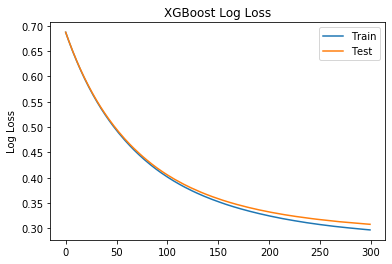

In [89]:
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

from this we can say model overfits or underfits

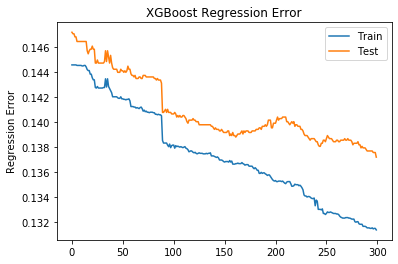

In [92]:
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Regression Error')
plt.title('XGBoost Regression Error')
plt.show()

## K-Fold Cross Validation
First I would like to introduce you to a golden rule — “Never mix training and test data”. Your first step should always be to isolate the test data-set and use it only for final evaluation. Cross-validation will thus be performed on the training set.

so in k fold we provide training set i.e X_train and y_train 

In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
accuracy = cross_val_score(estimator = model, X = X_train, y = y_train, cv=5).mean()

[19:53:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:53:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:53:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:53:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [28]:
accuracy

0.5014214131185067

But the purpose of cross-validation is not to come up with our final model. We don't use these 5 instances of our trained model to do any real prediction. For that we want to use all the data we have to come up with the best model possible. The purpose of cross-validation is model checking, not model building.

Now, say we have two models, say a linear regression model and a neural network. How can we say which model is better? We can do K-fold cross-validation and see which one proves better at predicting the test set points. But once we have used cross-validation to select the better performing model, we train that model (whether it be the linear regression or the neural network) on all the data. We don't use the actual model instances we trained during cross-validation for our final predictive model.



In [29]:
model.feature_importances_

array([0.01048223, 0.0055293 , 0.004569  , 0.05241917, 0.0617316 ,
       0.02245128, 0.01015805, 0.01532345, 0.00874813, 0.        ,
       0.00489895, 0.00782558, 0.01116433, 0.00611141, 0.        ,
       0.00724571, 0.3968285 , 0.00511386, 0.01053353, 0.00736153,
       0.00887899, 0.00668786, 0.        , 0.00457073, 0.0218931 ,
       0.01508536, 0.0116862 , 0.00994075, 0.02988861, 0.00251732,
       0.0165462 , 0.01011843, 0.00856424, 0.017567  , 0.00706286,
       0.00771968, 0.00707929, 0.04083923, 0.0071722 , 0.01017386,
       0.00605741, 0.00412083, 0.00150732, 0.00610808, 0.01128781,
       0.00330538, 0.00768894, 0.00133623, 0.00246927, 0.00478109,
       0.00159183, 0.00108883, 0.        , 0.00324949, 0.00183626,
       0.00316113, 0.00219884, 0.        , 0.00142713, 0.        ,
       0.        , 0.        , 0.        , 0.0018662 , 0.        ,
       0.        , 0.00386373, 0.        , 0.00139152, 0.        ,
       0.00506241, 0.        , 0.        , 0.        , 0.00607

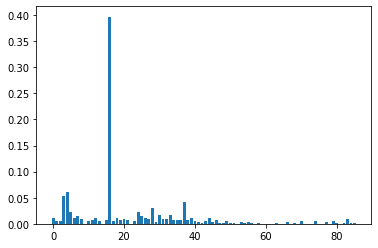

In [30]:
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

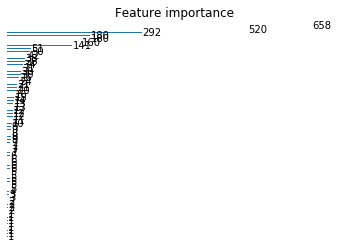

In [31]:
from xgboost import plot_importance

plot_importance(model)

plt.axis('off')
plt.show()


In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [33]:
X.head(10)

,age,fnlwgt,education,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,77516,9,13,2174,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,9,13,0,0,13,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,11,9,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,1,7,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,9,13,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,37,284582,12,14,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,49,160187,6,5,0,0,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,52,209642,11,9,0,0,45,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,31,45781,12,14,14084,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,42,159449,9,13,5178,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [34]:
scaled_X = sc.fit_transform(X)

In [35]:
X_sca_train,X_sca_test,y2_train,y2_test = train_test_split(scaled_X,y,test_size = 0.30, random_state= 355)

In [36]:
scaled_model = xgb.XGBRegressor(objective = 'binary:logistic')

In [37]:
scaled_model.fit(X_sca_train,y2_train)

[19:53:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1,
             objective='binary:logistic', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [38]:
x_sca_test = pd.DataFrame(X_sca_test)

In [39]:
scaled_model.score(X_sca_test,y2_test)

0.502838408595599

let's use PCA for feature selection and see if it improves our accuracy.

In [40]:
from sklearn.decomposition import PCA

In [41]:
pca = PCA()

In [42]:
principalcomponents = pca.fit_transform(scaled_X)

In [43]:
pd.DataFrame(principalcomponents).head()

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,0.441887,-1.297268,-2.381369,0.840365,0.685803,1.453112,-0.183509,-0.045889,-1.056270,1.701810,...,-0.680735,-1.217552,0.832715,0.041719,-0.135406,-0.126432,-0.051208,-0.016031,0.030709,-3.925280e-15
1,-2.533547,-0.197540,-0.531977,-0.027064,-0.041807,1.146804,0.634872,1.652472,1.226829,-0.002592,...,-0.917015,-0.337668,-0.249691,0.025638,-0.007573,-0.344616,-0.041550,-0.017949,-0.008315,-2.066216e-15
2,0.549460,-0.875016,1.084444,0.138452,0.191300,-0.092205,-1.376136,-0.375343,-1.018463,0.016395,...,0.080703,-0.012822,-0.271516,-0.002086,1.124867,0.089370,0.004244,-0.030501,-0.014591,3.538193e-15
3,0.458968,1.792712,1.552904,-1.726841,-3.433739,-0.269437,-0.712655,-0.636165,-0.351992,-0.683321,...,0.362269,-0.312177,-0.515674,0.135515,-0.236748,-0.118033,-0.040208,-0.076509,-0.011659,-6.525215e-15
4,0.401656,3.944495,-1.174187,-0.684178,0.590169,-1.248365,2.644444,-4.033532,2.475555,-0.873223,...,-1.055688,0.213968,0.475929,-0.123698,0.373717,0.072491,-0.298545,-0.059724,-0.018854,1.501582e-15


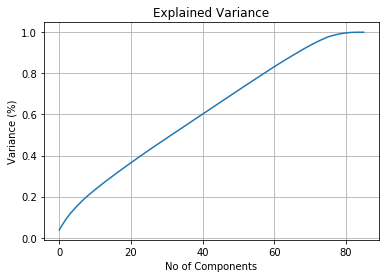

In [44]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No of Components')
plt.ylabel('Variance (%)') # for each components
plt.title('Explained Variance')
plt.grid(True)
plt.show()

We can see that around 100% of the variance is being explained by 80 components. So instead of giving all 11 columns as input in our algorithm let's use these 8 principal components instead.

In [45]:
pca = PCA(n_components=80)
new_data = pca.fit_transform(scaled_X)

In [46]:
principle_x = pd.DataFrame(new_data)

In [47]:
principle_x.head(10)

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,0.441887,-1.297268,-2.381369,0.840365,0.685803,1.453112,-0.183509,-0.045889,-1.056270,1.701810,...,-0.129981,-0.025323,-1.651825,0.508083,-0.541632,-0.056042,-0.680735,-1.217552,0.832715,0.041719
1,-2.533547,-0.197540,-0.531977,-0.027064,-0.041807,1.146804,0.634872,1.652472,1.226829,-0.002592,...,-1.239650,0.719343,-1.081324,0.224859,2.103863,-0.202525,-0.917015,-0.337668,-0.249691,0.025638
2,0.549460,-0.875016,1.084444,0.138452,0.191300,-0.092205,-1.376136,-0.375343,-1.018463,0.016395,...,-0.057748,-1.063202,0.129908,0.623328,-0.122333,-0.509957,0.080703,-0.012822,-0.271516,-0.002086
3,0.458968,1.792712,1.552904,-1.726841,-3.433739,-0.269437,-0.712655,-0.636165,-0.351992,-0.683321,...,0.530935,-0.108298,-0.774543,0.515596,0.402438,0.411528,0.362269,-0.312177,-0.515674,0.135515
4,0.401656,3.944495,-1.174187,-0.684178,0.590169,-1.248365,2.644444,-4.033532,2.475555,-0.873223,...,-0.260842,-0.866368,0.897653,-1.759057,0.037506,0.658498,-1.055688,0.213968,0.475929,-0.123698
5,-1.455134,-0.139619,-0.942302,-0.141852,0.559091,-2.656168,2.401444,-0.867442,1.383578,0.125466,...,-0.058954,-0.056455,1.449943,-0.919108,-0.286324,-0.169287,-0.209273,-0.858291,0.446806,-0.055595
6,4.502979,5.240942,-0.395980,-3.646236,-1.168385,0.993207,-2.634987,-2.535276,2.603858,-0.740585,...,-0.437570,1.617050,2.290863,1.947458,-0.853981,-0.762555,0.275002,0.851355,-0.226433,-0.262247
7,-2.858455,0.026181,0.075442,-0.285269,-0.288880,1.287234,-0.109599,1.321955,1.460336,0.440247,...,-0.659119,-0.214273,-0.558568,0.797483,0.845979,0.734182,0.260642,0.811997,0.285646,0.037760
8,0.576590,-1.423349,-2.036421,1.575242,1.617815,-0.518613,-1.331572,-0.932414,-0.158456,-0.847078,...,-0.243796,-0.538142,0.290433,-0.620336,0.576253,0.176418,0.274435,0.382064,-0.495025,0.082977
9,-1.861782,-0.291270,0.257576,0.416722,-0.009539,-1.348274,-0.248412,-0.275899,0.630601,-0.154479,...,-0.134349,0.976898,-0.526387,-0.178117,0.284502,-0.065519,-0.491202,-0.242284,-0.182309,0.020461


In [48]:
X_pca_train,X_pca_test,y3_train,y3_test = train_test_split(principle_x,y,test_size=0.25,random_state=0)

In [49]:
model_pca = xgb.XGBRegressor(objective='binary:logistic')

In [50]:
model_pca.fit(X_pca_train,y_train)

[19:53:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1,
             objective='binary:logistic', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [51]:
model_pca.score(X_pca_test,y3_test)

0.41011298598857215

In [52]:
corr = df.corr()

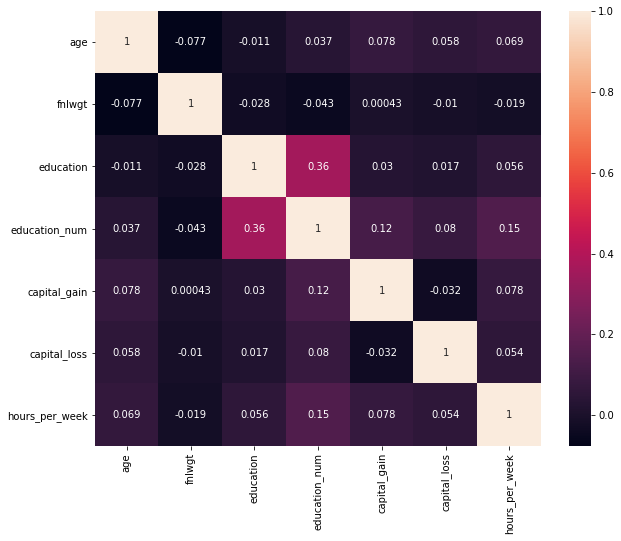

In [53]:
plt.figure(figsize=[10,8])
sns.heatmap(corr,annot=True)